In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import math


%matplotlib inline

data = []
with open('ex2data2.txt') as fp:
    line = fp.readline()
    while line:
        line = fp.readline()
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineArr = line.split(',')
        try:
            lineArr2 = [float(lineArr[0]), float(lineArr[1]), float(lineArr[2])]
        except ValueError:
            pass
        data.append(lineArr2)
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])

X = []
Y = []
for t in df.itertuples():
    currentx = np.array([t[1], t[2]]).T
    X.append(currentx)
    Y.append(t[3])

X = np.matrix(X).T
Y = np.matrix(Y).T

# Visualizing our data

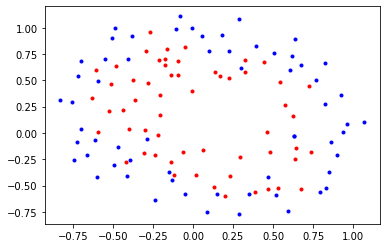

In [121]:
df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
plt.plot(df0['x1'], df0['x2'], 'b.')
plt.plot(df1['x1'], df1['x2'], 'r.')
plt.show()

# Our Neural Network will be structured like the following diagram:
We have 2 input features,
        3 neurons in the hidden layer,
        and 1 output neuron

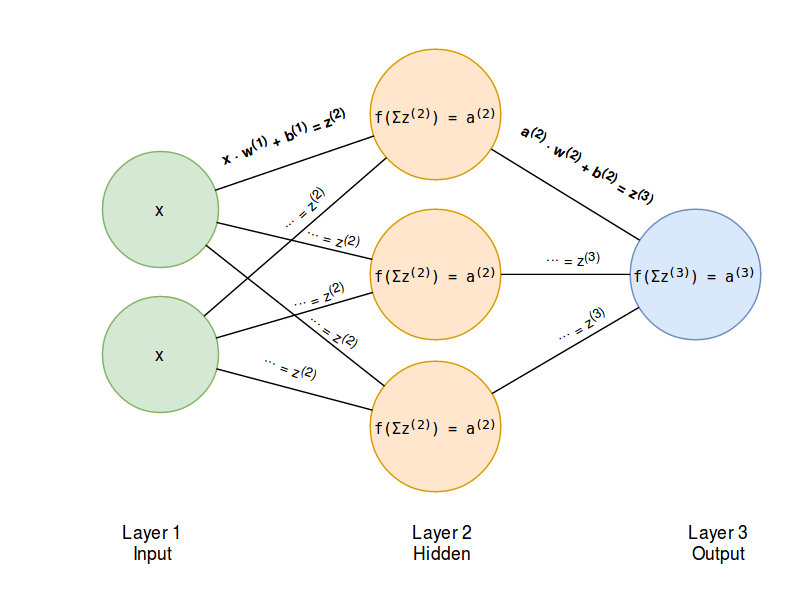

# Creating our Functions needed for Forward and Back Propogation

In [141]:
def tanhActivation(z1Arr):
    return np.tanh(z1Arr)

def sigmoid(z2Arr):
    return np.array(1/(1+np.power(math.e, -z2Arr)))

def costFunction(A3):
    return float(sum(np.power((A3-Y), 2)))

def tanhPrime(ZArr):
    return 1 - np.power((tanhActivation(ZArr)), 2)

# Initialize weights to a random decimal number between -1 and 1

In [142]:
#Initialize random weights
# 2 corresponds to # input features
# 1 corresponds to output nodes

# number of hidden nodes
n1 = 3

W1 = 2 * np.random.rand(16, 2) - 1
W2 = 2 * np.random.rand(1, 16) - 1

# Cost before training weights

In [124]:
Z2 = np.dot(W1, X)
A2 = tanhActivation(Z2)
Z3 = np.dot(W2, A2)
A3 = sigmoid(Z3).T
print("The total cost of our function before training weights:")
print(costFunction(A3))

The total cost of our function before training weights:
36.337888795656426


In [129]:
a = 0.03

print("Starting weights W1: ")
print(W1)
print("-----------------------")
print("Starting weights W2: ")
print(W2)
print("-----------------------")

#forward propogation on entire training set
m = 118
iterations = 30000

for it in range(iterations):
    Z2 = np.dot(W1, X)
    A2 = tanhActivation(Z2)
    Z3 = np.dot(W2, A2)
    A3 = sigmoid(Z3).T
    costFunction(A3)

    #BACKPROP
    dZ3 = A3-Y
    dW2 = np.matmul(dZ3.T, A2.T)/m
    dZ2 = np.multiply(np.matmul(np.matrix(W2.T), np.matrix(dZ3).T), tanhPrime(np.matrix(Z2)))
    dW1 = np.matmul(dZ2, X.T)/m

    #UPDATE WEIGHTS:
    W1 = W1 - (a*dW1)
    W2 = W2 - (a*dW2)
    

print("Ending weights W1: ")
print(W1)
print("-----------------------")
print("Ending weights W2: ")
print(W2)
print("-----------------------")

Starting weights W1: 
[[ 0.14761691 -2.08329665]
 [-0.28666516 -0.53682948]
 [-0.28654356 -0.53686966]
 [ 0.28655052  0.53686736]
 [-1.62161006 -1.28563592]
 [-0.28687922 -0.53675869]
 [-0.2867823  -0.53679075]
 [ 0.28668778  0.536822  ]
 [ 0.28655163  0.53686699]
 [ 0.28662804  0.53684175]
 [-0.28692547 -0.53674338]
 [-1.6245305  -1.28657873]
 [ 1.62142016  1.28564361]
 [-0.07572213 -1.95870089]
 [ 0.28657932  0.53685785]
 [ 0.28668207  0.53682389]]
-----------------------
Starting weights W2: 
[[-2.45712195  1.78572768  1.7878185  -1.78769879 -1.65762522  1.78205541
   1.78371679 -1.78533917 -1.78767966 -1.78636555  1.78126329 -1.58490063
   1.66016844 -2.11855666 -1.78720335 -1.7854372 ]]
-----------------------
Ending weights W1: 
[[ 0.09742965 -1.89760367]
 [-0.26228592 -0.47857141]
 [-0.26227982 -0.47856937]
 [ 0.26228016  0.47856948]
 [-1.44192719 -1.14622301]
 [-0.26229673 -0.47857497]
 [-0.26229182 -0.47857336]
 [ 0.26228705  0.47857178]
 [ 0.26228022  0.4785695 ]
 [ 0.2622840

# Compute the Cost of our Neural Network

In [130]:
Z2 = np.dot(W1, X)
A2 = tanhActivation(Z2)
Z3 = np.dot(W2, A2)
A3 = sigmoid(Z3).T
print("The total cost of our function with our trained weights:")
print(costFunction(A3))

The total cost of our function with our trained weights:
25.008739042380405


# Evaluate our Neural Network on some data

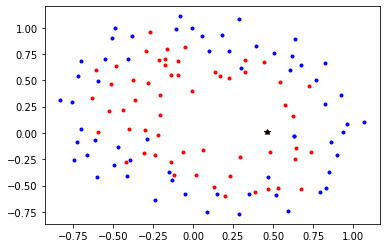

The Neural Network is 62.23% confident that our test data point is a red point


In [140]:
x1 = X[0, 42]
x2 = X[1, 42]

df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
plt.plot(df0['x1'], df0['x2'], 'b.')
plt.plot(df1['x1'], df1['x2'], 'r.')
plt.plot(x1, x2, 'k*')
plt.show()

x = np.matrix([x1, x2]).T

z1 = np.dot(W1, x)
a1 = tanhActivation(z1)
z2 = np.dot(W2, a1)
a2 = sigmoid(z2)
print("The Neural Network is " + str(round((a2[0][0]*100), 2)) + "% confident that our test data point is a red point")